# 1º Entrega - Trabajo Final
> ### Coderhouse
> ### Data Science 1: Fundamentos para la ciencia de datos
> ### Juan Pablo Ludueña

### Abstract:
Éste trabajo se centra en el análisis de un dataset de reservas de hoteles con el objetivo de desarrollar un modelo predictivo que permita inferir la probabilidad de cancelación de una reserva. 
El dataset incluye variables clave como las fechas de reserva, la cantidad de adultos, menores y bebés por reserva, la nacionalidad de los huéspedes, y el tipo de habitación seleccionada, y otra información que puede ser relevante a la hora de determinar nuestra hipotesis. 
A través de técnicas de análisis exploratorio de datos (EDA) y visualización de datos, se identificarán patrones y correlaciones que puedan indicar factores determinantes en la decisión de cancelación.

#### Primeros pasos

Para poder analizar los datos que tenemos utilizaremos herramientas tecnológicas que nos facilitarán el trabajo.
Necesitaremos tener instalado Python en su última versión, además las siguientes librerias que nos seran de mucha ayuda:

```
pip3 install pandas
pip3 install matplotlib
pip3 install seaborn
pip3 install numpy
```

#### Se carga el dataframe leyendo el archivo .CSV

In [21]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Cargar el archivo CSV
df_hotel_original = pd.read_csv('../hotel_bookings.csv', delimiter=',')
df_hotel_original.head()

# Eliminar filas que estén completamente vacías
df_hotel = df_hotel_original.dropna(how='all')
# Convierto las columnas de año, mes y día en una columna de fecha
df_hotel['fecha_ingreso'] = pd.to_datetime(df_hotel[['arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month']].astype(str).agg('-'.join, axis=1))

df_cancelados = df_hotel['is_canceled']
df_cancelados.describe().round(2)

count    119390.00
mean          0.37
std           0.48
min           0.00
25%           0.00
50%           0.00
75%           1.00
max           1.00
Name: is_canceled, dtype: float64

La función "describe" sobre el dataframe "df_cancelad" nos indica que el porcentaje de cancelaciónes registrados es del %37 del total de reservas 

### Gráficos com matplotLib

-  Reservas de hoteles por año

Podemos ver en éste grafico cual es el hotel que mas reservas tiene

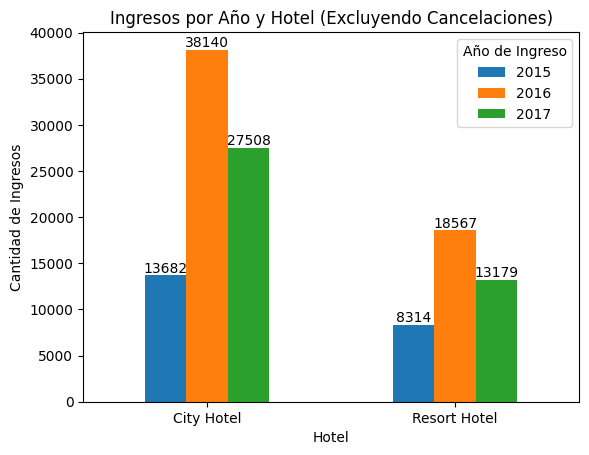

In [29]:
# Agrupar por hotel y año para contar los ingresos
ingresos_por_hotel = df_hotel.groupby(['hotel', 'arrival_date_year']).size().unstack(fill_value=0)

# Crear el gráfico de barras
fig, ax = plt.subplots()
barras = ingresos_por_hotel.plot(kind='bar', ax=ax)
ax.set_title('Ingresos por Año y Hotel (Excluyendo Cancelaciones)')
ax.set_xlabel('Hotel')
ax.set_ylabel('Cantidad de Ingresos')
ax.legend(title='Año de Ingreso')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
for container in barras.containers:
    barras.bar_label(container, label_type='edge', color='black')

plt.show()

- porcentaje de reservas efectivas(sin cancelar) en total

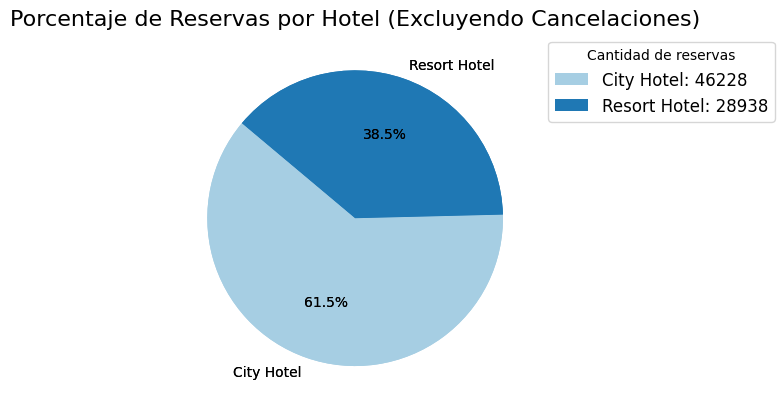

In [30]:
# Filtrar los registros que no fueron cancelados
df_sin_cancelados = df_hotel[df_hotel['is_canceled'] == 0]

# Contar el número de reservas por hotel
reservas_por_hotel = df_sin_cancelados['hotel'].value_counts()

# Generar el gráfico de torta
fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(reservas_por_hotel, 
                                  labels=reservas_por_hotel.index, 
                                  autopct='%1.1f%%', 
                                  startangle=140, 
                                  colors=plt.cm.Paired.colors)


# Crear una lista de etiquetas para la leyenda
legend_labels = [f'{hotel}: {cantidad}' 
                 for hotel, cantidad in zip(reservas_por_hotel.index, reservas_por_hotel)]
# Agregar la leyenda
ax.legend(wedges, legend_labels, title="Cantidad de reservas", loc="upper left", bbox_to_anchor=(1, 0, 0.5, 1), fontsize=12)

ax.pie(reservas_por_hotel, labels=reservas_por_hotel.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
ax.set_title('Porcentaje de Reservas por Hotel (Excluyendo Cancelaciones)', fontsize=16)

plt.show()


- Aquí vemos en un gráfico de lineas la comparación de resrevas por día entre los hoteles que tenemos relevados

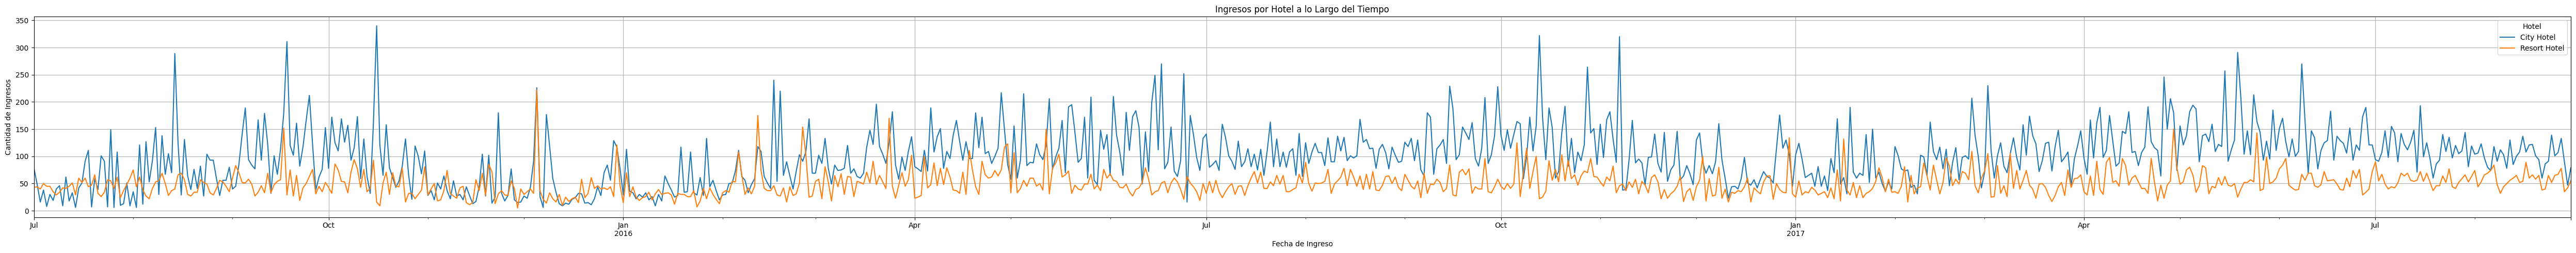

In [31]:
# Agrupo por hotel y fecha para contar los ingresos
ingresos_por_fecha = df_hotel.groupby(['hotel', 'fecha_ingreso']).size().unstack().T

# Crear el gráfico de líneas
fig, ax = plt.subplots(figsize=(50, 5))
ingresos_por_fecha.plot(ax=ax)

ax.set_title('Ingresos por Hotel a lo Largo del Tiempo')
ax.set_xlabel('Fecha de Ingreso')
ax.set_ylabel('Cantidad de Ingresos')
ax.legend(title="Hotel")
ax.grid(True)

plt.tight_layout()
plt.show()

### Gráficos con seaborn

- Aqui vemos el mapa de calor de las cantidades de reservas canceladas por mes en cada hotel, podemos ver que la mayor cantidad de cancelaciones se ven en los meses de Mayo y Agosto

/Users/pablo/Library/Python/3.9/lib/python/site-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/Users/pablo/Library/Python/3.9/lib/python/site-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


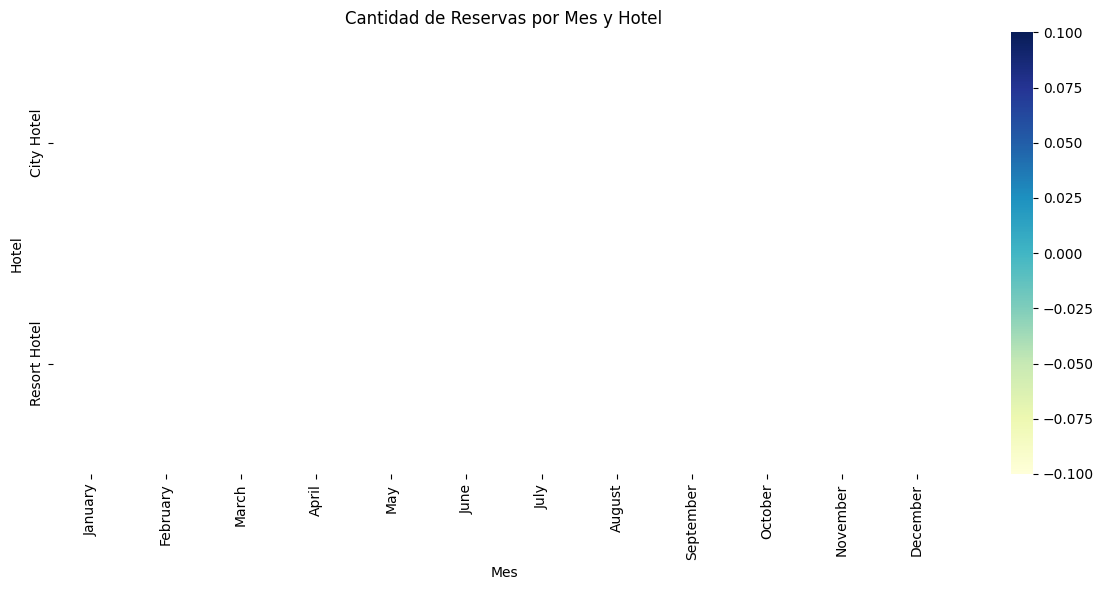

In [32]:
# Agrupar por mes y contar el número de reservas
df_con_cancelados = df_hotel[df_hotel['is_canceled'] == 1]
reservas_por_mes = df_con_cancelados.groupby('arrival_date_month').size().reset_index(name='count')

# Convertir los datos agrupados en una matriz
# Aquí utilizamos el índice de los meses y los hoteles como índices de la matriz
# Si tienes diferentes hoteles, puedes pivotar los datos para cada hotel

# Crear una columna para los hoteles para demostrar múltiples hoteles
reservas_por_mes_hotel = df_con_cancelados.groupby(['hotel', 'arrival_date_month']).size().unstack(fill_value=0)

# Ordenar los meses de manera cronológica
order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
reservas_por_mes_hotel = reservas_por_mes_hotel.reindex(order, axis=1)

# Crear el heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(reservas_por_mes_hotel, cmap='YlGnBu', annot=True, fmt='d')

# Personalizar el gráfico
plt.title('Cantidad de Reservas por Mes y Hotel')
plt.xlabel('Mes')
plt.ylabel('Hotel')

# Ajustar el diseño para una mejor visualización
plt.tight_layout()
plt.show()


- Aquí podemos ver la tasa de cancelaciónes por mes teniendo en cuenta el total de registros de nuestro dataset.

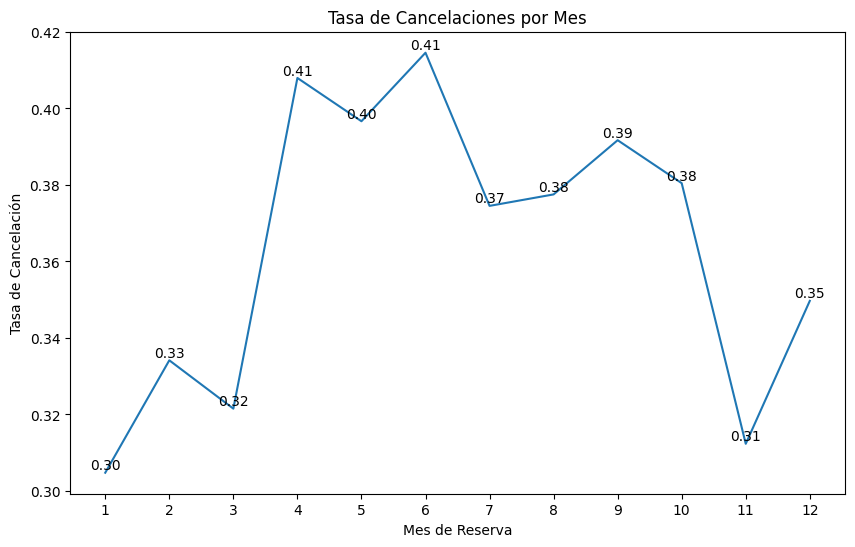

In [33]:
# Convertir las fechas de reserva a meses
df_hotel['arrival_date_month'] = pd.to_datetime(df_hotel['fecha_ingreso']).dt.month

# Calcular la tasa de cancelaciones por mes
cancelaciones_por_mes = df_hotel.groupby('arrival_date_month')['is_canceled'].mean()

# Crear el gráfico de líneas
plt.figure(figsize=(10, 6))
sns.lineplot(x=cancelaciones_por_mes.index, y=cancelaciones_por_mes.values)

# Agregar etiquetas a los ejes
plt.xlabel('Mes de Reserva')
plt.ylabel('Tasa de Cancelación')
plt.title('Tasa de Cancelaciones por Mes')
plt.xticks(ticks=range(1, 13))
for i in range(1, 13):
    if i in cancelaciones_por_mes.index:
        plt.text(i, cancelaciones_por_mes[i], f'{cancelaciones_por_mes[i]:.2f}', 
                 ha='center', va='bottom')

plt.show()


- Éste gráfico nos muestra el mapa de calor de la corelación entre las columnas numéricas del dataset y la variable "is_canceled", nos muestra que la corelacin mas fuerte se da con el valor "lead_time" que indica el tiempo que transcurre entre la reserva y la fecha de ingreso. Por lo que podemos deducir que mientras mas grande es este tiempo, es mas probable que la reserva se cancele

In [34]:
""" ésta sección se deja comentado porque la correlación está mal aplicada a la variable 'is_cancelled' 

# seleccionamos solo las columnas numéricas
df_column_numeric = df_hotel.select_dtypes(include=['number'])

# matriz de correlación
correlation_matrix = df_column_numeric.corr()

# Filtrar la matriz de correlación para incluir solo la fila/columna "is_canceled"
correlation_with_is_canceled = correlation_matrix[['is_canceled']].sort_values(by='is_canceled', ascending=False)
# Crear el heatmap
sns.heatmap(correlation_with_is_canceled, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)

# Personalizar el gráfico
plt.title('Correlación entre "is_canceled" y otras variables')
plt.show()
"""

' ésta sección se deja comentado porque la correlación está mal aplicada a la variable \'is_cancelled\' \n\n# seleccionamos solo las columnas numéricas\ndf_column_numeric = df_hotel.select_dtypes(include=[\'number\'])\n\n# matriz de correlación\ncorrelation_matrix = df_column_numeric.corr()\n\n# Filtrar la matriz de correlación para incluir solo la fila/columna "is_canceled"\ncorrelation_with_is_canceled = correlation_matrix[[\'is_canceled\']].sort_values(by=\'is_canceled\', ascending=False)\n# Crear el heatmap\nsns.heatmap(correlation_with_is_canceled, annot=True, cmap=\'coolwarm\', fmt=\'.2f\', vmin=-1, vmax=1)\n\n# Personalizar el gráfico\nplt.title(\'Correlación entre "is_canceled" y otras variables\')\nplt.show()\n'

- El siguiente gráfico muestra cómo ha variado el ADR promedio a lo largo del tiempo para cada hotel, lo que te permitirá analizar tendencias y comparar el desempeño entre los hoteles a lo largo de los meses.

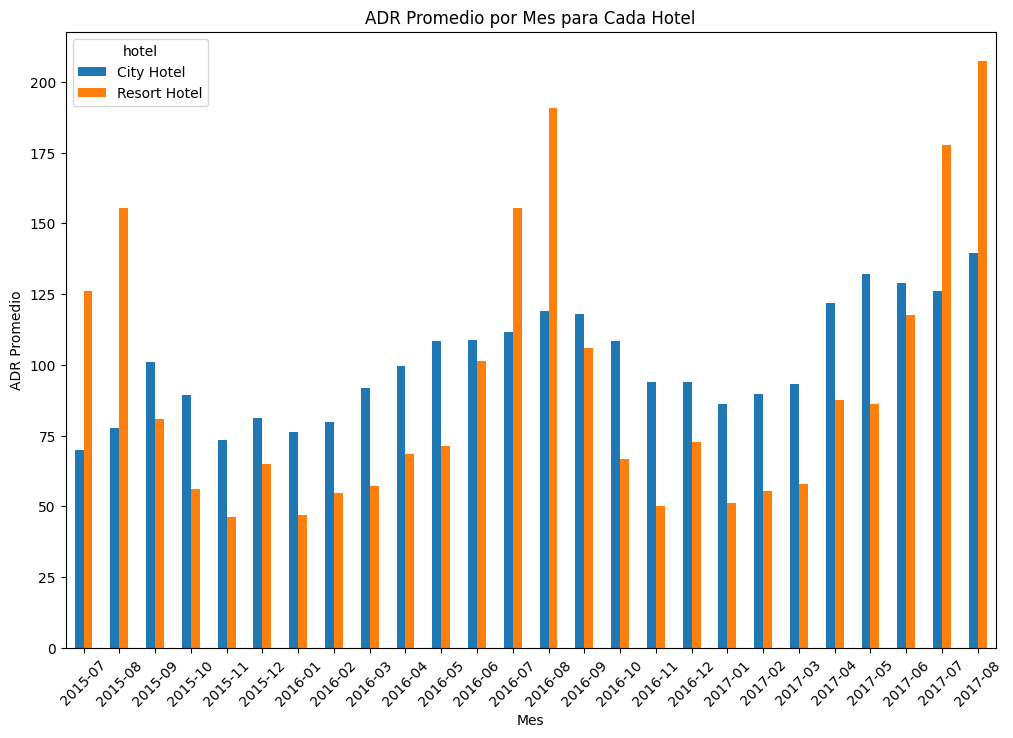

In [35]:
# Agrupo los datos por hotel y mes para calcular el ADR promedio
adr_promedio_por_mes = df_hotel.groupby([df_hotel['fecha_ingreso'].dt.to_period('M'), 'hotel'])['adr'].mean().unstack().fillna(0)

# Gráfico de barras agrupadas
adr_promedio_por_mes.plot(kind='bar', figsize=(12, 8))
plt.xlabel('Mes')
plt.ylabel('ADR Promedio')
plt.title('ADR Promedio por Mes para Cada Hotel')
plt.xticks(rotation=45)
plt.show()